# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2023
## Методы нахождения оценок

**Гайд, как моделировать оценки**:

В разных задачах Вы будете видеть ключевое слово "смоделируйте". Для моделирования оценки необходимо сгенерировать большое число выборок из одного распределения, построить по каждой из выборок оценку и получить выборку оценок. Далее по выборке оценок можно построить гистограмму или эмпирическую функцию распределения, и сделать выводы о распределении оценок.

Как мы знаем по теореме Гливенко-Кантелли, эмпирическая функция распределения сходится к реальной, и, при некоторых условиях, гистограмма сходится к плотности, если она существует.

Для красоты графиков можно (и приветствуется) вместо гистограммы использовать ядерную оценку плотности (kernel density estimator): https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html

Загрузим все необходимые датасеты. Если что-то пошло не так, то просто скачайте файлы по ссылке вручную.

In [ ]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=1fMQ0H-_E4U25XHB2SH7ryoZPLG2MHlLQ
!gdown https://drive.google.com/uc?id=1cJywRii7wBZa0B2uAvvu56JFCLPnlOSs

Downloading...
From: https://drive.google.com/uc?id=1fMQ0H-_E4U25XHB2SH7ryoZPLG2MHlLQ
To: /content/Cauchy.csv
100% 18.7k/18.7k [00:00<00:00, 46.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1cJywRii7wBZa0B2uAvvu56JFCLPnlOSs
To: /content/Weibull.csv
100% 17.9k/17.9k [00:00<00:00, 39.8MB/s]


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats as sps

from matplotlib import pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", font_scale=1.4)

**Условие задания**: Великая Ордалия уже почти готова к путешествию, однако враги империи проникли в замок и уничтожили все формулы с оценками из Домашнего задания 1. Можно попытаться восстановить их по памяти, но не лучше ли взамен старых оценок изобрести новые? Помимо этого за две тысячи лет (прошедших с момента первой ордалии до наших дней) точечные оценки значительно устарели и уже не способны отражать реальную суть вещей, поэтому Вам будет предложено попробовать на практике два других подхода: интервальные оценки и байесовские оценки.

В этой практике Вам предложено реализовать несколько подходов к построению оценок и понять, когда какой подход применять.

**Дисклеймер**:
В задачах будет разбиение на пункты, но оцениваться задача будет **целиком**. Можете считать, что выполнение всех пунктов вместе с отсутствием замечаний по полноте анализа/эффективности кода/информативности графиков/т.д. приносит полный балл.

## Задача 1

Для постоянного слежения за большой армией колдуны-гностики создали магическое устройство для наблюдения с неба.

На высоте в 1 милю от центра армии (на Земле) закреплено устройство,
которое периодически излучает лучи на поверхность Земли (считайте,
что поверхность Земли представляет из себя прямую). Пусть $l$ —
перпендикуляр к поверхности Земли, опущенный из точки, в которой
закреплено устройство. Угол к прямой $l$ (под которым происходит
излучение) устройство выбирает случайно из равномерного
распределения на отрезке $\left(-\frac{\pi}{2}, \frac{\pi}{2}\right)$ (все выборы
осуществляются независимо). В этих предположениях точки пересечения
с поверхностью имеют распределение Коши с плотностью $p(x) =
\frac{1}{\pi(1 + (x-x_0)^2)}.$ Неизвестный параметр сдвига $x_0$
соответствует проекции точки расположения устройства на поверхность
Земли (направление оси и начало координат на поверхности Земли
выбраны заранее некоторым образом независимо от расположения
устройства). В файле `Cauchy.csv` находятся координаты точек
пересечения лучей с поверхностью Земли.

**Нам предстоит построить и изучить оценку максимального правдоподобия (ОМП)**

In [ ]:
cauchy_sample = pd.read_csv("Cauchy.csv")["sample"].values

1. Выпишите теоретическое правдоподобие выборки из распределения Коши и его логарифм. Можно ли найти максимум аналитически?

Решение: Напишем функцию правдоподобия. $f(x_0) = \displaystyle{∏_{i=1}^n} \frac{1}{π(1 + (x_i - x_0)^2)}$. Обычно мы берем ее логарифм, чтобы бороться с очень маленькими/большими значениями. Напишем ее логарифм: $\log(f(x_0)) = \displaystyle{\sum_{i=1}^n} -\log(π(1 + (x_i - x_0)^2))$<br>
`Можно ли найти максимум аналитически?`: Да, можно, у нас даже была такая задача на одном из семинаров. Но есть проблема, $f(x_0)$, очевидно, зависит от размера выборки и мы искали ее для n = 1,2. Если же взять общий случай, то нам придется решать уравнение той степени, сколько у нас наблюдений, что не является тривиальной задачей в общем случае.


2. Визуализируйте выборку (или её часть) и сделайте предположение о том, чему может быть равен неизвестный параметр. Обоснуйте предположение.

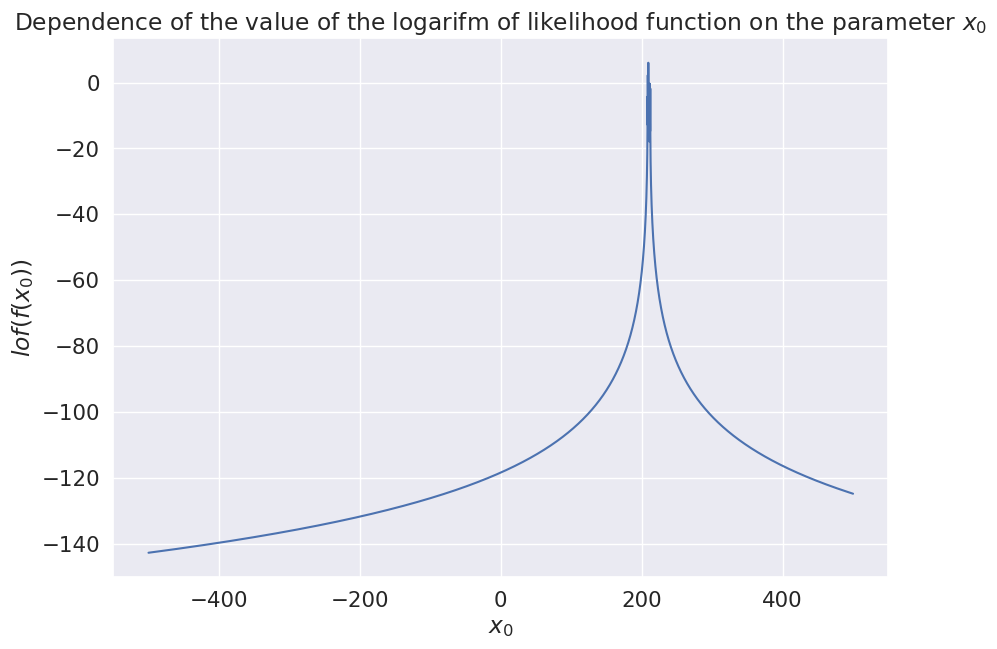

In [ ]:
def likelihood(sample, x_0):
  return np.sum(-np.log(np.pi * (1 + sample - x_0) ** 2))

x_0 = np.arange(-500, 500, 0.01)
likelihood_1 = []
for i in x_0:
  likelihood_1.append(likelihood(cauchy_sample[:10], i))
likelihood_1 = np.array(likelihood_1)
plt.figure(figsize = (10, 7))
plt.title(r'Dependence of the value of the logarifm of likelihood function on the parameter $x_0$')
plt.xlabel(r'$x_0$')
plt.ylabel(r'$lof(f(x_0))$')
plt.plot(x_0, likelihood_1)

Видим, что мы можем сделать оценку на параметр, взяв argmax по всем x_0. По графику видно, что x_0 чуть больше 200. Найдем его точнее.

In [ ]:
def estimations(x_0, likelihood):
  return x_0[np.argmax(likelihood)]
x_0_estimate_1 = estimations(x_0, likelihood_1)
print(x_0_estimate_1)

209.4099999993548


3. Напишите функцию, которая находит оценку максимального правдоподобия, получив на вход выборку из распределения Коши находит максимум. Мы предполагаем, что Вы будете производить оценку по сетке --- для некоторого множества возможных параметров (отрезка с концами, которые Вам кажутся верными) постройте сетку с некоторым шагом (рекомендуется 0.01) и выберите лучший параметр на этой сетке.

Однако, если Вы хорошо поняли курс оптимизации, то напишите оптимизатор, который находит максимум сам. Задачу можно переформулировать, чтобы ответ не изменился, а оптимизация шла быстрее. За хорошо сформулированную оптимизационную задачу и реализацию мы добавим 5 бонусных баллов.

 Оцените параметр сдвига
методом максимального правдоподобия
* по первым 10 измерениям
* по первым 100 измерениям
* по всей выборке.


Обрежем график, уже зная примерное значение параметра.

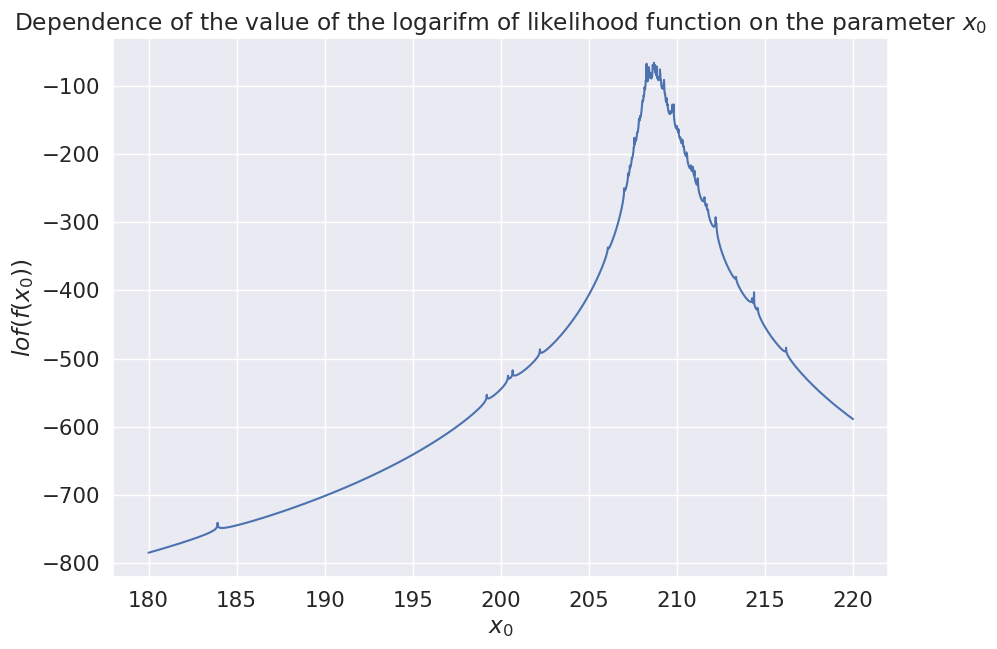

In [ ]:
x_0 = np.arange(180, 220, 0.01)
likelihood_1 = []
for i in x_0:
  likelihood_1.append(likelihood(cauchy_sample[:100], i))
likelihood_1 = np.array(likelihood_1)
plt.figure(figsize = (10, 7))
plt.title(r'Dependence of the value of the logarifm of likelihood function on the parameter $x_0$')
plt.xlabel(r'$x_0$')
plt.ylabel(r'$lof(f(x_0))$')
plt.plot(x_0, likelihood_1)

In [ ]:
x_0_estimate_2 = estimations(x_0, likelihood_1)
print(x_0_estimate_2)

208.6899999999739


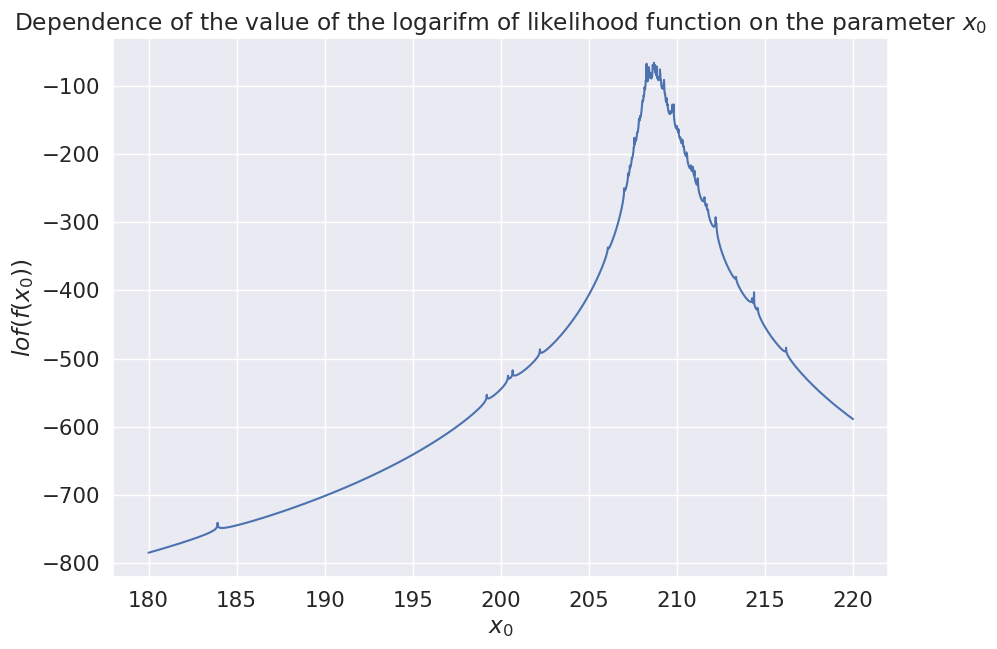

In [ ]:
x_0 = np.arange(180, 220, 0.01)
likelihood_1 = []
for i in x_0:
  likelihood_1.append(likelihood(cauchy_sample[:100], i))
likelihood_1 = np.array(likelihood_1)
plt.figure(figsize = (10, 7))
plt.title(r'Dependence of the value of the logarifm of likelihood function on the parameter $x_0$')
plt.xlabel(r'$x_0$')
plt.ylabel(r'$lof(f(x_0))$')
plt.plot(x_0, likelihood_1)

In [ ]:
x_0_estimate_3 = estimations(x_0, likelihood_1)
print(x_0_estimate_3)

208.6899999999739


In [ ]:
print(f'Выборка из 10 элементов - x0 = {x_0_estimate_1}\n',
f'Выборка из 100 элементов - x0 = {x_0_estimate_2}\n'
f'Выборка из всех элементов - x0 = {x_0_estimate_3}\n')

Выборка из 10 элементов - x0 = 209.4099999993548
 Выборка из 100 элементов - x0 = 208.6899999999739
Выборка из всех элементов - x0 = 208.6899999999739



4. Изучите функцию `sps.cauchy.fit`. Как она находит параметр? Сравните полученные результаты с результатом этой функции.

Она выполняет оценку параметров распределения, минимизируя отклонение между теоретической функцией плотности вероятности распределения Коши и данных, используя метод максимального правдоподобия.

In [ ]:
sps.cauchy.fit(cauchy_sample)

(207.97772827944334, 0.9451391657739334)

Видим, что результаты, найденные нами, очень близки к тем, которые выдает функция sps.cauchy.fit. Стоит учесть, что она делает внутри почти то же самое, что и мы для нахождения параметра.

Вспомните задачу 3 из домашнего задания 1, где были другие оценки распределения Коши. Сделайте вывод о том, какие оценки предпочтительнее.

## Задача 2

Имперские банки каждую ночь подсчитывают баланс ресурсов Ордалии по сравнению с вчерашней ночью. За день приходят как новые ресурсы, так и потребляются уже имеющиеся. Как и у любого другого банка, если обозначить $X^1$ – максимальное значение баланса за день, $X^2$ – значение баланса в полночь, то $X = X^1 - X^2$ имеет распределение Вейбулла с функцией распределения $F(x) = 1 - e^{-x^\gamma} (x > 0),$ где $\gamma > 0$ –
параметр масштаба. В файле Weibull.csv находятся соответствующие измерения.

Наша задача состоит в том, чтобы оценить параметр масштаба.

In [ ]:
weibull_sample = np.loadtxt("Weibull.csv")

In [ ]:
print(len(weibull_sample), len(weibull_sample[weibull_sample != 0]))

3652 3145


1. Постройте гистограмму выборки. Не забудьте подобрать `xlim`, `ylim` и параметр `bins`, чтобы гистограмма была информативна.

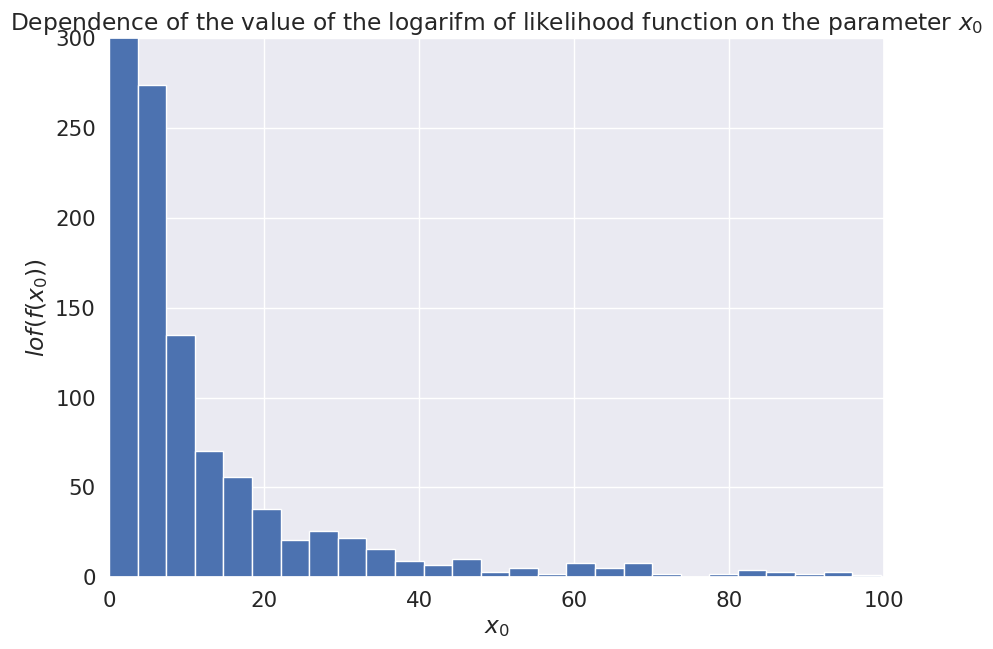

In [ ]:
plt.figure(figsize = (10, 7))
plt.title(r'Dependence of the value of the logarifm of likelihood function on the parameter $x_0$')
plt.xlabel(r'$x_0$')
plt.ylabel(r'$lof(f(x_0))$')
plt.xlim([0, 100])
plt.ylim([0, 300])
plt.hist(weibull_sample, bins=100)
plt.show()

Видим, насколько много нулей в выборке.

Проведем небольшой предварительный анализ. Итак, если наши данные распределены согласно распределению Вейбулла, то справедливы следующие рассуждения:
$$
\begin{aligned} F(x) &=1-e^{-(x)^{\gamma}} \\-\ln (1-F(x)) &=x^{\gamma} \\ \underbrace{\ln (-\ln (1-F(x)))}_{y^{\prime}} &=\underbrace{\gamma \ln x}_{\text {kx }^{\prime}} \end{aligned}
$$
А значит и
$$
\underbrace{\ln (-\ln (1-\hat{F}(x)))}_{y^{\prime}} ≈\underbrace{\gamma \ln x}_{\text {kx }^{\prime}}
$$


Однако здесь мы сталкиваемся с проблемой: в нашей выборке есть нули. А логарифм нуля, как известно, не определен. Мы предлагаем вам придумать решение этой проблемы и обосновать его применимость. Ситуация, когда статистическая модель не описывает какие-то артефакты в данных (как, например, нули в этой задаче) для практики типична, и с ней приходится что-то делать.

Ответьте на два вопроса:
а. Могут ли нули появляться если честно семплировать из распределения Вейбулла?
б. Зная плотность распределения и то, что компьютерная точность неабсолютна, откуда нули всё-таки взялить, учитывая то, что авторы задания семплировали из распределения Вейбулла выборку?

Ответ:<br>
а) Распределение Вейбулла характеризуется плотностью вероятности, которая начинается с нуля при нулевом значении случайной величины, но она быстро возрастает с ростом значения случайной величины. То есть вероятность получить нуль как результат сэмплирования из распределения Вейбулла стремится к нулю, но не ноль.<br>
б) Возможно нули связаны с проблемами в округлении или погрешностью в измерениях. Возможно проблема может быть даже в отсутствии достаточного количества данных. Но на самом деле, по логике нашей задачи, баланс банка действительно может быть нулевым, что не очень соответствует распределению Вейбулла.
Самым очевидным решением проблемы будет просто выкинуть все нули. Но это решение может быть не самым лучшим, так как мы потеряем более, чем 1/8 всех данных, что некорректно с точки зрения анализа. Поэтому мы можем заменить все нули на значения очень очень близкие к 0.<br>
Также попробуем заменять все нули на среднее внутри выборки + какое-то число в отрезке от 0 до 1.

In [ ]:
weibull_sample_without_zeroes = weibull_sample[weibull_sample != 0]

In [ ]:
weibull_sample_mean = []
for i in range(len(weibull_sample)):
  if weibull_sample[i] == 0:
    weibull_sample_mean.append(np.mean(weibull_sample) + np.random.rand())
  else:
    weibull_sample_mean.append(weibull_sample[i])

In [ ]:
eps = 1e-5
for i in range(len(weibull_sample)):
  if weibull_sample[i] == 0:
    weibull_sample[i] += eps

2. Посчитайте эмпирическую функцию распределения и
$$y\prime = \ln (-\ln (1-\hat{F}(x))) \quad x' = ln x$$
 где $x$ – элементы исходной выборки.

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(weibull_sample)

**Постройте** график (`plt.scatter`) от (y', x') для Ваших способов борьбы с нулями разными цветами.
Не забудьте про `alpha=0.05` и легенду. Такой график называется `Weibull plot` и является аналогом `qqplot` для распределения Вейбулла.

<ipython-input-70-104332700cdb>:2: RuntimeWarning: divide by zero encountered in log
  plt.scatter(np.log(weibull_sample), np.log(-np.log(1-ecdf(weibull_sample))), c='b', label='Изменение нулей на eps', alpha=0.05)
<ipython-input-70-104332700cdb>:3: RuntimeWarning: divide by zero encountered in log
  plt.scatter(np.log(weibull_sample_without_zeroes), np.log(-np.log(1-ecdf(weibull_sample_without_zeroes))), c='r', label='Удаление нулей', alpha=0.05)
<ipython-input-70-104332700cdb>:4: RuntimeWarning: divide by zero encountered in log
  plt.scatter(np.log(weibull_sample_mean), np.log(-np.log(1-ecdf(weibull_sample_mean))), c='g', label='Средние + eps', alpha=0.05)


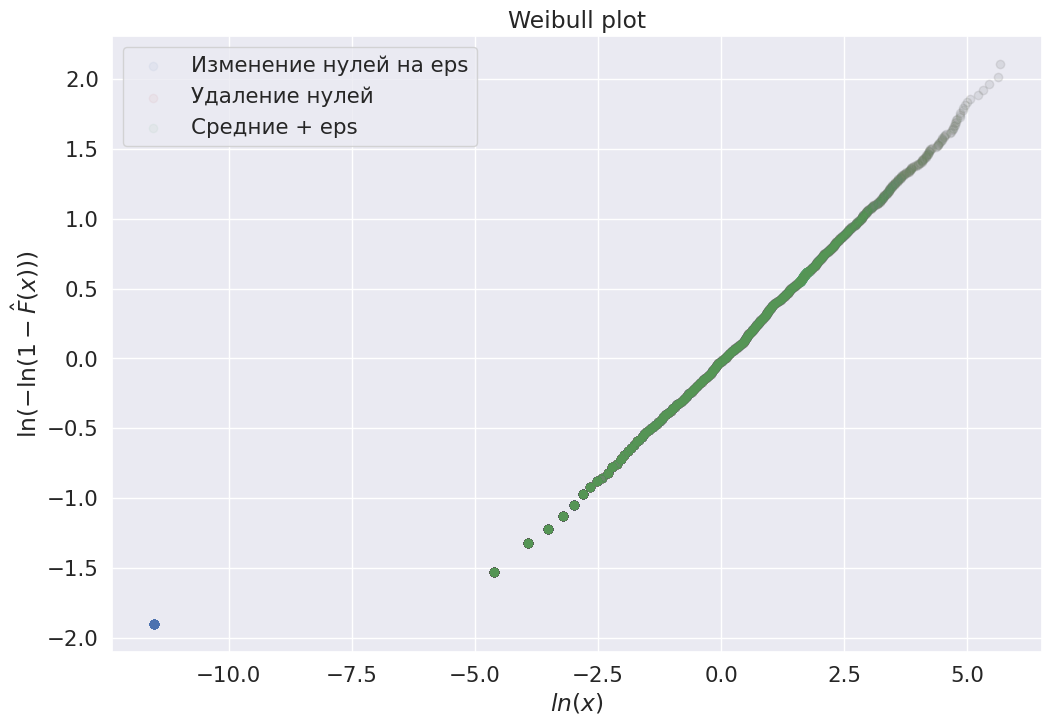

In [ ]:
plt.figure(figsize = (12, 8))
plt.scatter(np.log(weibull_sample), np.log(-np.log(1-ecdf(weibull_sample))), c='b', label='Изменение нулей на eps', alpha=0.05)
plt.scatter(np.log(weibull_sample_without_zeroes), np.log(-np.log(1-ecdf(weibull_sample_without_zeroes))), c='r', label='Удаление нулей', alpha=0.05)
plt.scatter(np.log(weibull_sample_mean), np.log(-np.log(1-ecdf(weibull_sample_mean))), c='g', label='Средние + eps', alpha=0.05)
plt.title('Weibull plot')
plt.xlabel(r'$ln(x)$')
plt.ylabel('$\ln (-\ln (1-\hat{F}(x)))$')
plt.legend()

Сделайте вывод. Какой способ вам кажется более правильным и почему?

**Вывод:** Что неожиданно, получилось, что график с удалением нулей выглядит более естественно, в то время, как график с изменением нулей на eps имеет сильныые выбросы, хотя изначально казалось, что способ с изменением более правильный и естественный. Также видим, что именно способ с удалением нулей дает лучший результат еще и потому, что он хорошо ложится на одну прямую, а это подтверждает его принадлежность к распределению Вейбулла. Но при этом график с заменой на среднее выглядит даже чуть лучше, потому что он также хорошо ложится на прямую, не имеет выбросов и при этом мы не уменьшали размер выборки. Также такой способ действительно помог бороться с выбросами, которые возникали в способе с прибавлением eps. Поэтому в дальнейшем его и будем использовать.

3. Оцените параметр формы методом максимального правдоподобия
* по
первым 4 годам;
* по всей выборке.
Оценку произведите по сетке (в
логарифмической шкале) или оптимизатором. Известно, что $\log_{10}\gamma \in [-2, 2].$
Выберите шаг равным $10^{-3}.$

Решение:<br>
Плотность распределения $ρ(x) = γx^{γ - 1} ⋅ e^{x^γ}$. Теперь берем логарифм от этого и получаем: $ln(f(x)) = \displaystyle{\sum_{k=1}^n (ln(γ) + (γ - 1)ln(x) - x^γ)}$.<br>
Так как мы разобрались с нулями, будем использовать способ с их удалением, потому что он оказался лучше.

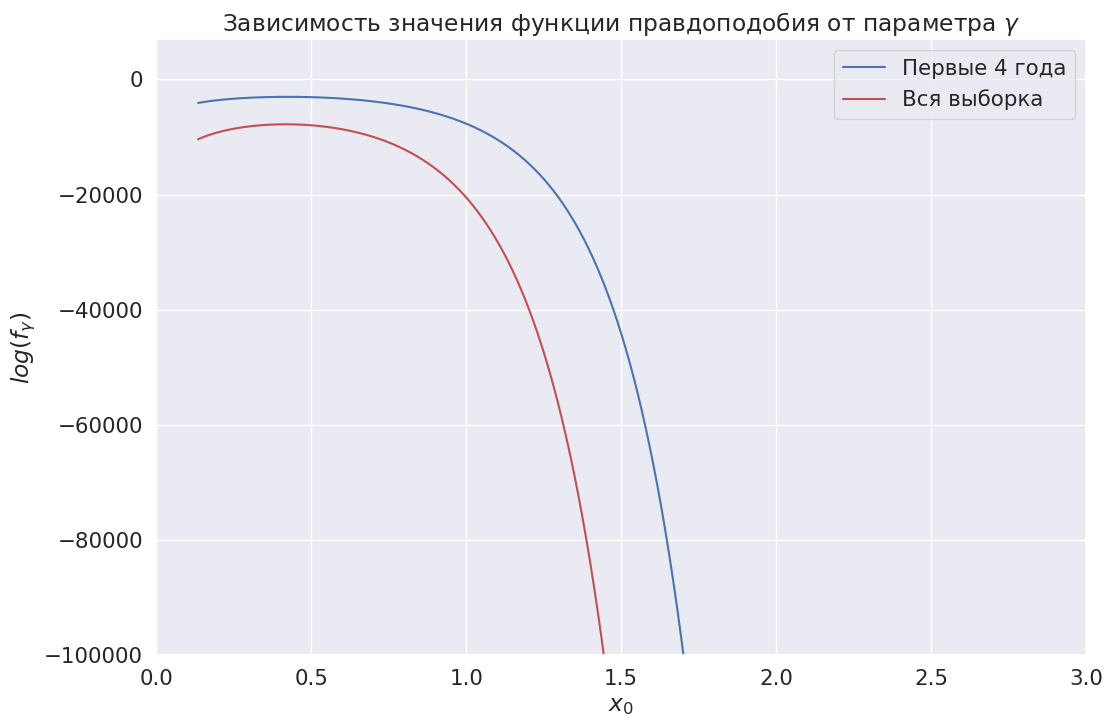

In [ ]:
def likelihood(sample, x_0):
  return np.sum(np.log(x_0) + (x_0 - 1)*np.log(sample) - (sample)**x_0)

log_x_0 = np.arange(-2, 2, 0.001)
likelihood_1 = []
for i in log_x_0:
  likelihood_1.append(likelihood(weibull_sample_mean[:1461], np.exp(i)))
likelihood_1 = np.array(likelihood_1)

likelihood_2 = []
for i in log_x_0:
  likelihood_2.append(likelihood(weibull_sample_mean, np.exp(i)))
likelihood_2 = np.array(likelihood_2)

plt.figure(figsize = (12, 8))
plt.plot(np.exp(log_x_0), likelihood_1, 'b-', label='Первые 4 года')
plt.plot(np.exp(log_x_0), likelihood_2, 'r-', label='Вся выборка')
plt.title(r'Зависимость значения функции правдоподобия от параметра $\gamma$')
plt.xlabel(r'$x_0$')
plt.ylabel(r'$log(f_{\gamma})$')
plt.ylim((-1e5, max(likelihood_1) + 10000))
plt.xlim([0, 3])
plt.legend()

Теперь можем получить оценку!

In [ ]:
gamma_1 = np.exp(log_x_0[np.argmax(likelihood_1)])
gamma_2 = np.exp(log_x_0[np.argmax(likelihood_2)])
print('Оценка за первые 4 года', gamma_1)
print('Оценка за все время', gamma_2)

Оценка за первые 4 года 0.42485812046187105
Оценка за все время 0.4181144834938674


Сравните результаты с `sps.weibull.fit(sample_2, fscale=1, floc=0)`

In [ ]:
gamma_sps = sps.weibull_min.fit(weibull_sample_mean, fscale=1, floc=0)[0]
print('Значение оценки через встроенную функцию библиотеки scipy', gamma_sps)

Значение оценки через встроенную функцию библиотеки scipy 0.41799991631090383


Видим, что аналогично первому заданию оценка полученная нами практически и оценка из библиотчной функции практически совпадают, что является очень хорошим результатом.

4. Постройте график $y = \gamma \cdot x$ для всех полученных $\gamma$ (`plt.plot`) и `scatter plot` из предыдущего пункта ($y\prime \ x\prime$) для того метода, который вам кажется более правильным. Хорошо ли линии соответствуют выборке? Как вы думаете, почему?

<ipython-input-74-369e970b2a10>:8: RuntimeWarning: divide by zero encountered in log
  plt.scatter(np.log(weibull_sample_mean), np.log(-np.log(1-ecdf(weibull_sample_mean))), c='b', alpha=0.05)


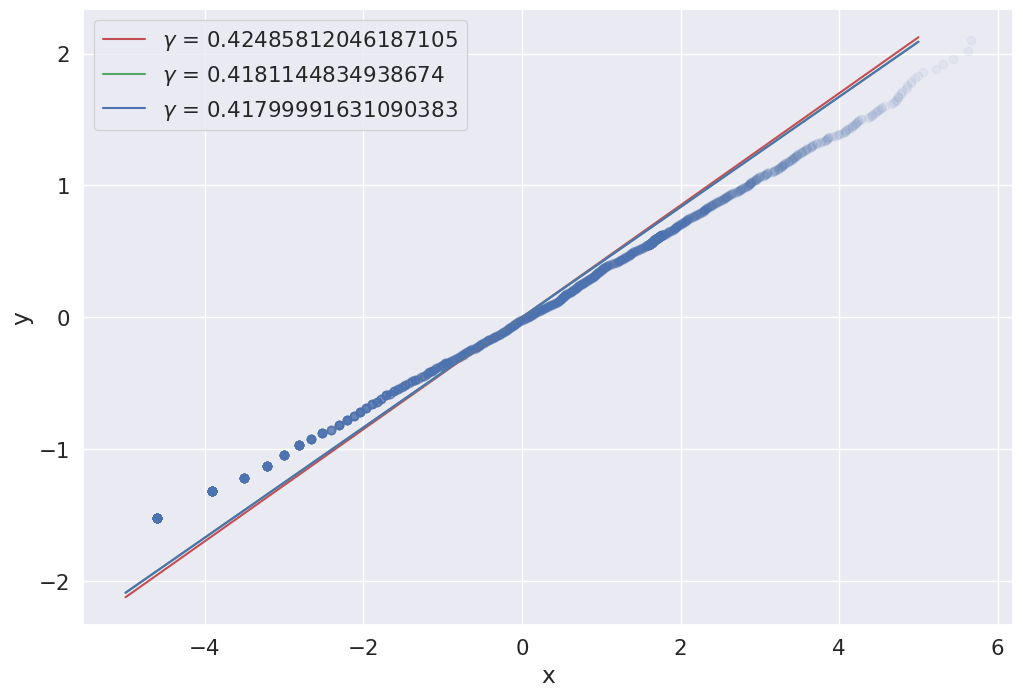

In [ ]:
x = np.linspace(-5, 5, 100)
plt.figure(figsize=(12, 8))
plt.plot(x, gamma_1 * x, 'r-', label=rf'$\gamma$ = {gamma_1}')
plt.plot(x, gamma_2 * x, 'g-', label=rf'$\gamma$ = {gamma_2}')
plt.plot(x, gamma_sps * x, 'b-', label=rf'$\gamma$ = {gamma_sps}')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(np.log(weibull_sample_mean), np.log(-np.log(1-ecdf(weibull_sample_mean))), c='b', alpha=0.05)
plt.legend()

**Вывод:** Видим, что линии достаточно близки друг к другу и к выборке, данной нам, а значит хорошо ей соответствуют.

## Задача 3

Хорошим методом получения аналитических оценок является метод моментов.

1. Сгенерируйте выборки $X_1, \ldots, X_N$ из $\mathit{N}(0, \theta)$, $U(0, \theta)$, $\Gamma(1, \theta)$ (**параметризация $k, \theta$**), $\theta = 3$ для всех распределений $(N = 1000).$ Посчитайте значения оценок (по выборке $X_1, \ldots X_n$) методом моментов. Промоделируйте полученные оценки для разных размеров выборки $n < N$ и изучите их скорости сходимости. На графике отразите истинный параметр. Можете построить отдельный график модуля/квадрата разности оценки и параметра (риск) для какой-то выборке и посмотреть, как быстро риск сходится к нулю.

In [ ]:
N = 1000
theta = 3
norm_sample = sps.norm(loc = 0, scale=np.sqrt(theta)).rvs(size=N)
uniform_sample = sps.uniform(loc = 0, scale=theta).rvs(size=N)
gamma_sample = sps.gamma(a=1, loc = 0, scale=theta).rvs(size=N)
n = np.arange(1, N + 1)
norm_estimation = ((norm_sample**2).cumsum()) / n
uniform_estimation = 2 * (uniform_sample.cumsum()) / n
gamma_estimation = (gamma_sample.cumsum()) / n

Решение (вывод метода моментов для каждого случая):<br>
N(0, θ): $EX_1 = 0 = \overline{X}, DX_1 = θ = \overline{X^2} - \overline{X}^2 = \overline{X^2} ⇒ \hat{θ} = \overline{X^2}$.<br>
U(0, θ): $EX_1 = \frac{θ}{2} = \overline{X} ⇒ \hat{θ} = 2\overline{X}$<br>
Г(1, θ): $EX_1 = 1 ⋅ θ = \overline{X} ⇒ \hat{θ} = \overline{X}$.

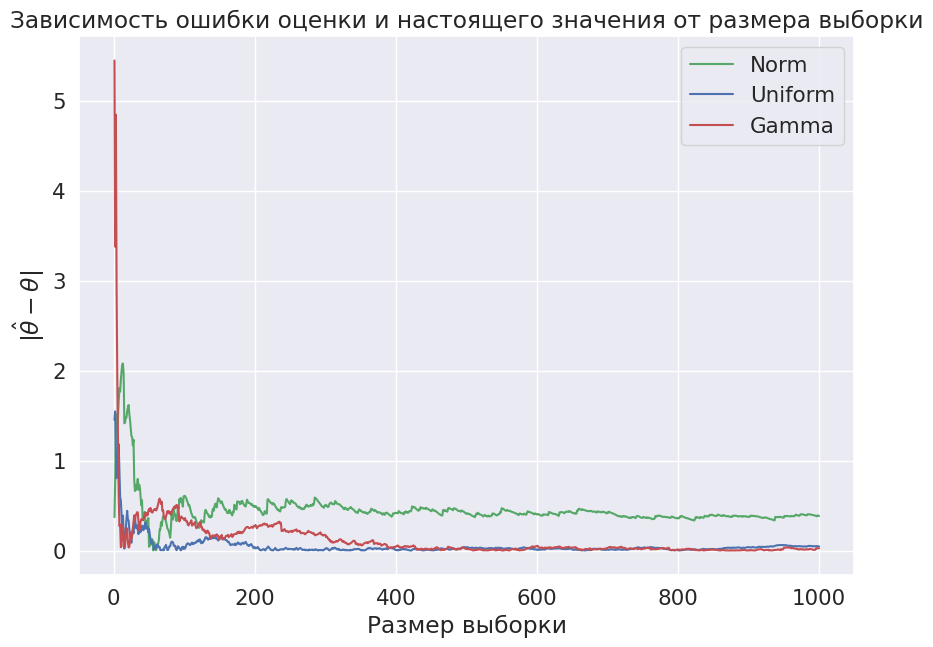

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(n, np.abs(norm_estimation - theta), 'g-', label='Norm')
plt.plot(n, np.abs(uniform_estimation - theta), 'b-', label='Uniform')
plt.plot(n, np.abs(gamma_estimation - theta), 'r-', label='Gamma')
plt.title('Зависимость ошибки оценки и настоящего значения от размера выборки')
plt.xlabel('Размер выборки')
plt.ylabel(r'|$\hat{\theta} - \theta$|')
plt.legend()

По графикам видно, что разность оценки, полученной методом моментов, и настоящего значения θ сходится к 0, при n -> ∞. Это подтверждает работоспособность и корректность метода моментов для нахождения оценок.

2. Есть два замечательных распределения, которые игнорировать никак нельзя. Первое --- $Pareto(k)$ с плотностью $p(x) = kx^{-k-1}$ ($k$ произвольное), $Cauchy(0, \theta)$  с плотностью $p(x) = \frac{\theta}{x^2 + \theta^2}$. Запишите оценки методом моментов для них и проверьте их на состоятельность на практике (моделированием). Подсказка: внимательно изучите, чему равны моменты каждого из распределений и при каких условиях. Можно ли гарантировать состоятельность полученных оценок каким-то теоретическими фактами?

Решение (аналитический вывод оценок):<br>
Pareto(k): $EX_1 = \frac{kX_1}{k - 1} ⇒ 1 - \frac{1}{k} = \frac{X_1}{\overline{X}} ⇒ \frac{1}{k} = 1 - \frac{X_1}{\overline{X}} ⇒ \hat{k} = \frac{\overline{X}}{\overline{X} - X_1}$ Стоит учесть, что такой вывод (да и вообще мат. ожидание этого распределения) будет верно только при k > 1 (На самом деле n-ый момент этого распределения существует тогда и только тогда, когда k > n).<br>
Cauchy(0, θ): В методе моментов мы вычисляем $M_k = \frac{1}{n} \displaystyle{\sum_{i=1}^n} |X_i|^k$ при данном k. Далее мы приравниваем $M_k$ к математическому ожиданию случайной величины и получаем оценку на параметр, но для распределения Коши моменты целых порядов не существуют, а если быть точнее равны ∞. Но рассмотрим 0 < k < 1, тогда мат. ожидание существует и при этом равно $\frac{θ^k}{cos\frac{πk}{2}}$. Возьмем k = 0,5. Тогда получаем:<br>
$EX_i^\frac{1}{2} = \frac{θ^\frac{1}{2}}{cos\frac{π}{4}} ⇒ \hat{θ} = cos^2 \frac{π}{4} ⋅ \overline{|X|^\frac{1}{2}}$. Такую оценку мы и будем рассматривать.

Моделирование:

С этим кодом все сходится, но такой способ не одобряется.

In [ ]:
'''from scipy.optimize import minimize
cauchy_sample = sps.cauchy(loc=0, scale=theta).rvs(size=N)
def log_likelihood(theta, sample):
  return -np.sum(np.log(np.pi * theta) + np.log(1 + (sample / theta)**2))

cauchy_estimation = []
for i in range(1, N + 1):
  cauchy_estimation.append(minimize(lambda theta: -log_likelihood(theta, cauchy_sample[:i]), 1.0, method='Nelder-Mead').x[0])
cauchy_estimation = np.array(cauchy_estimation)'''

"from scipy.optimize import minimize\ncauchy_sample = sps.cauchy(loc=0, scale=theta).rvs(size=N)\ndef log_likelihood(theta, sample):\n  return -np.sum(np.log(np.pi * theta) + np.log(1 + (sample / theta)**2))\n\ncauchy_estimation = []\nfor i in range(1, N + 1):\n  cauchy_estimation.append(minimize(lambda theta: -log_likelihood(theta, cauchy_sample[:i]), 1.0, method='Nelder-Mead').x[0])\ncauchy_estimation = np.array(cauchy_estimation)"

Для распределения Коши.

In [ ]:
cauchy_sample = sps.cauchy(loc=0, scale=theta).rvs(size=N)
k = 0.5
M_k = ((np.absolute(cauchy_sample) ** k).cumsum()) / n
cauchy_estimation = (M_k * np.cos(np.pi * k / 2)) ** (1 / k)

Графики.

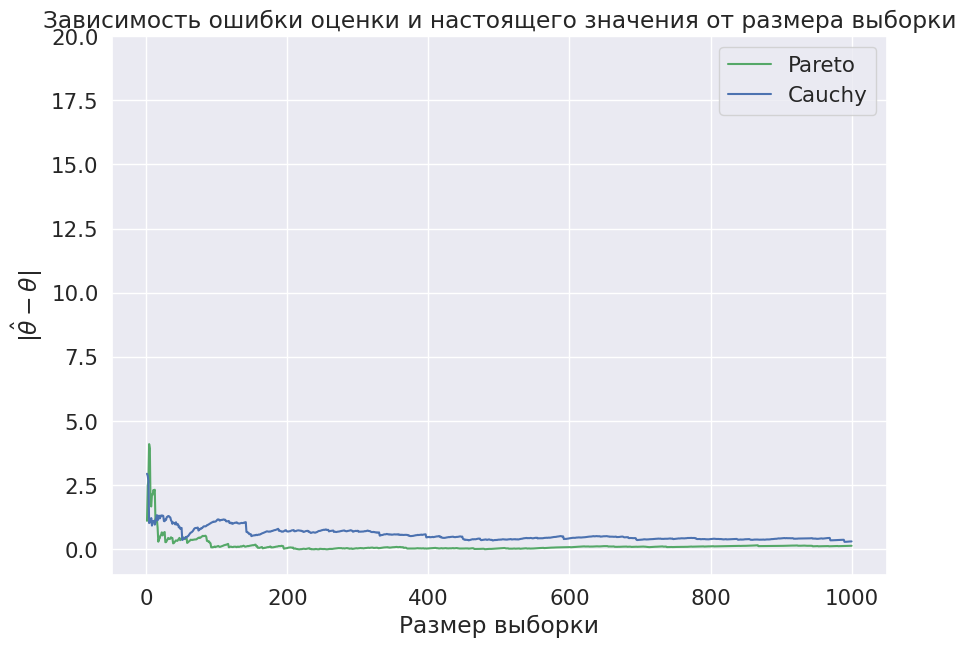

In [ ]:
k = 2.62
pareto_sample = sps.pareto(k).rvs(size=N)
pareto_estimation = ((pareto_sample).cumsum()) / ((pareto_sample).cumsum() - n*min(pareto_sample))
plt.figure(figsize=(10, 7))
plt.plot(n, np.abs(pareto_estimation - k), 'g-', label='Pareto')
plt.plot(n, np.abs(cauchy_estimation - theta), 'b-', label='Cauchy')
plt.title('Зависимость ошибки оценки и настоящего значения от размера выборки')
plt.xlabel('Размер выборки')
plt.ylabel(r'|$\hat{\theta} - \theta$|')
plt.ylim([-1, 20])
plt.legend()

Видим аналогичную с прошлыми тремя распределениями ситуацию. При росте размера выборки наша оценка показывется себя лучше и лучше по сравнению с настоящей, что значит, что метод моментов опять сработал. Ситуация аналогична для обоих распределений, но также можно сказать, что оптимайзер scipy находит оценку на параметр практически идеально.<br>
Осталось рассмотреть вопрос с состоятельностью данных оценок. В методичке и на семинарах у нас была теорема, которая гласила о том, что если $\hat{θ} = h^{-1}(\overline{g(X)})$ - оценка параметра θ, полученная методом моментов, и функция $h^{-1}$ - непрерывна, то $\hat{θ}$ - состоятельная. Рассмотрим $\overline{g(X)} = \frac{1}{n} \displaystyle{\sum_{i=1}^n g(X_i) -> E_θ g(X_1) = h(θ)}$. Далее очевидно, что cos и $x^\frac{1}{2}$ - непрерывные функции. А отсюда уже получается, что оценка для параметра распределения Коши - состоятельная.

**Вывод:** В этой задаче мы проанализировали оценки с помощью метода моментов для пяти разных распределений и убедились в его корректности и работоспособности. Разность настоящего значения параметра и нашей оценки с ростом размера выборки стремится к нулю, что и является признаком хорошести нашей оценки.

**Следующие две задачи посвящены тому, как получать более информативные оценки, чем точечные. Нам приходится обращаться к ним, так как свойства точечных оценок являются предельными, и мы мало что знаем о том, насколько конкретное значение оценки близко к истинному значению параметра. В условиях кровавой войны информация должна быть максимальной.**

### Задача 4. Бутстреп

Для реальных данных часто сложно подобрать распределение и нужную параметризацию относительно $\theta$. Кроме того на практике сложно посчитать дисперсию оценки (для этого хотя бы нужно знать распределение, из которого пришла выборка) и какой-то отрезок, в который параметр попадёт с высокой вероятностью (такой отрезок называется **доверительным интервалом**_. На помощь в таких случаях приходит **бутстреп**.

Идея очень простая. Вспомним, как работает **метод подстановки** для получения оценок. В нём мы выражаем параметр при помощи распределения (как среднее или медиана, например), потом меняем распределение на эмпирическое и выражаем параметр уже через него. Бутстреп это подмена истинного распределения на эмпирическое.



1. Для каждого распределения из задачи 3 сгенерируйте выборку размера $N = 1000$. Далее замените Ваше распределение на равномерное распределение по построенной выборке (по теореме Гливенко-Кантелли эти распределения достаточно близки), и из эмпирического (равномерного) распределения постройте 100 выборок. Опишите, как Вы будете это делать. Указание: из истинного распределения (нормального и т.д.) новые данные генерировать **нельзя**. Бутстреп это способ получения псевдо-новых данных из уже имеющихся.

Ответ: Сгенерируем один раз выброрки размера N для каждого распределения. Потом с помощью квантилей заменим наше распределение на равномерное по построенным выборкам для каждого распределения. Далее будем использовать обычный метод бутстрапа, а именно вытаскиывать из уже построенной выборки 1000 раз объект с возвращением. Так строится одна выборка. Для каждого распределения выполним это 100 раз и получим 100 выборок из 1000 элементов.

In [ ]:
N = 1000
theta = 3
k = 2.62
norm_sample = sps.norm(loc = 0, scale=np.sqrt(theta)).rvs(size=N)
uniform_sample = sps.uniform(loc = 0, scale=theta).rvs(size=N)
gamma_sample = sps.gamma(a=1, loc = 0, scale=theta).rvs(size=N)

In [ ]:
def bootstrap_emperical(sample):
  new_sample = []
  for i in range(100):
    indexes = np.round(sps.uniform(loc=0, scale=999).rvs(size=1000)).astype(int)
    new_sample.append(sample[indexes])
  return np.array(new_sample)

Строим псевдо-выборки.

In [ ]:
new_bootstrap_uniform = bootstrap_emperical(uniform_sample)
new_bootstrap_gamma = bootstrap_emperical(gamma_sample)
new_bootstrap_norm = bootstrap_emperical(norm_sample)

2. Для каждой псевдо-выборки из предыдущего пункта постройте оценку методом моментов из задачи 3 и получится выборка оценок (как в домашке 1). По ней посчитайте эмпирическую (выборочную) дисперсию оценок и сделайте вывод о том, как связано значение дисперсии оценки (теоретической и бутстрепной) с точностью и скоростью сходимости оценки к параметру.

In [ ]:
#Считаем оценки (получаем выборку оценок)
norm_estimation = ((new_bootstrap_norm**2).mean(axis=1))
uniform_estimation = 2 * (new_bootstrap_uniform.mean(axis=1))
gamma_estimation = (new_bootstrap_gamma.mean(axis=1))
#Считаем выборочную дисперсию оценок
sigma_norm_estimation = (norm_estimation ** 2).mean() - norm_estimation.mean() ** 2
sigma_uniform_estimation = (uniform_estimation ** 2).mean() - uniform_estimation.mean() ** 2
sigma_gamma_estimation = (gamma_estimation ** 2).mean() - gamma_estimation.mean() ** 2
print(sigma_norm_estimation, np.var(norm_estimation))
print(sigma_uniform_estimation, np.var(uniform_estimation))
print(sigma_gamma_estimation, np.var(gamma_estimation))
print("Разность выборочной и теоретиеской дисперсии для нормального распределения: " + str(sigma_norm_estimation - np.var(norm_estimation)) + '\n',
      "Разность выборочной и теоретиеской дисперсии для равномерного распределения: " + str(sigma_uniform_estimation - np.var(uniform_estimation)) + '\n',
      "Разность выборочной и теоретиеской дисперсии для гамма распределения: " + str(sigma_gamma_estimation - np.var(gamma_estimation)))

0.01637302539605301 0.016373025396052548
0.003621195319890802 0.0036211953198914586
0.010658733221514893 0.010658733221515506
Разность выборочной и теоретиеской дисперсии для нормального распределения: 4.614364446098307e-16
 Разность выборочной и теоретиеской дисперсии для равномерного распределения: -6.565928356572215e-16
 Разность выборочной и теоретиеской дисперсии для гамма распределения: -6.123573870198129e-16


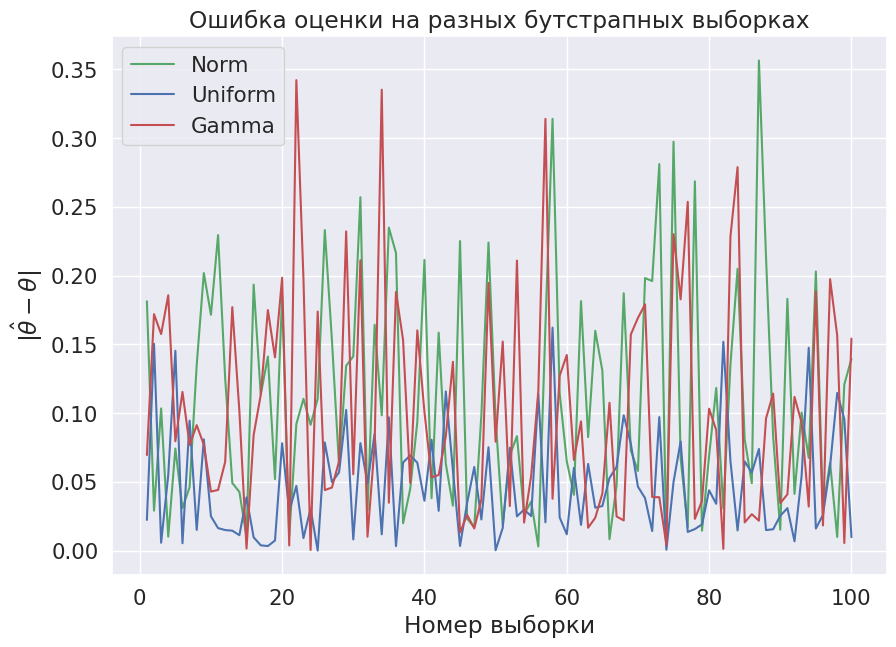

In [ ]:
plt.figure(figsize=(10, 7))
n = np.arange(1, 101, 1)
plt.plot(n, np.abs(norm_estimation - theta), 'g-', label='Norm')
plt.plot(n, np.abs(uniform_estimation - theta), 'b-', label='Uniform')
plt.plot(n, np.abs(gamma_estimation - theta), 'r-', label='Gamma')
plt.title('Ошибка оценки на разных бутстрапных выборках')
plt.xlabel('Номер выборки')
plt.ylabel(r'|$\hat{\theta} - \theta$|')
plt.legend()

Теперь посмотрим на графики и на разности теоретической и выборочной (эмпирической дисперсии). Видим, что они хоть и очень похожи, как и сами графики, но все же отличаются. Поэтому, смотря на графики и на разности делаем вывод: чем меньше бутстрепная дисперсия, и чем ближе она к теоретической, тем лучше наша оценка. Действительно, по графикам видно, что лучше всего была наша оценка для равномерного распределения, потом для гамма, а в уже в конце для нормального. Теперь смотрим на выводы: разность бутстрепной выборочной дисперсии и теоретической меньше всего (даже отрицательная, что, по идее, является очень хорошим результатом) у равномерного распределения, потом у гамма и только в самом конце у нормального распределения.

3. Бутстрепным доверительным интервалом порядка $\alpha$ называется отрезок $[\theta_{\frac{\alpha}{2}}, \theta_{1 - \frac{\alpha}{2}}]$, где $theta_{\alpha}$ это выборочный $\alpha$-квантиль из распределения оценок, построенного в задаче методом бутстрепа. Опишите, как такой выборочный квантиль связан с истинным квантилем распределения оценок и каким свойством обладал бы построенный отрезок, если бы мы его строили не эмпирически, а точно (с настоящими квантилями). Постройте доверительный интервал численно для разных значений параметра и изучите, часто ли параметр в него попадает.

Объявим функцию, которая будет считать нам выборку оценок для разных θ.

In [ ]:
def theta_estimation(theta, N):
  norm_sample = sps.norm(loc = 0, scale=np.sqrt(theta)).rvs(size=N)
  uniform_sample = sps.uniform(loc = 0, scale=theta).rvs(size=N)
  gamma_sample = sps.gamma(a=1, loc = 0, scale=theta).rvs(size=N)
  new_bootstrap_uniform = bootstrap_emperical(uniform_sample)
  new_bootstrap_gamma = bootstrap_emperical(gamma_sample)
  new_bootstrap_norm = bootstrap_emperical(norm_sample)
  norm_estimation = ((new_bootstrap_norm**2).mean(axis=1))
  uniform_estimation = 2 * (new_bootstrap_uniform.mean(axis=1))
  gamma_estimation = (new_bootstrap_gamma.mean(axis=1))
  return [norm_estimation, uniform_estimation, gamma_estimation]

In [ ]:
def count_if_in(alpha, theta, estimation):
  lower_quantile = np.percentile(estimation, len(estimation) * alpha / 2)
  upper_quantile = np.percentile(estimation, len(estimation) * (1 - alpha / 2))
  if theta >= lower_quantile and theta <= upper_quantile:
      return 1
  return 0

In [ ]:
thetas = np.arange(1, 3, 0.01)
all_estimations = []
for theta in thetas:
  all_estimations.append(theta_estimation(theta, N))
alphas = np.arange(0, 0.5, 0.01)

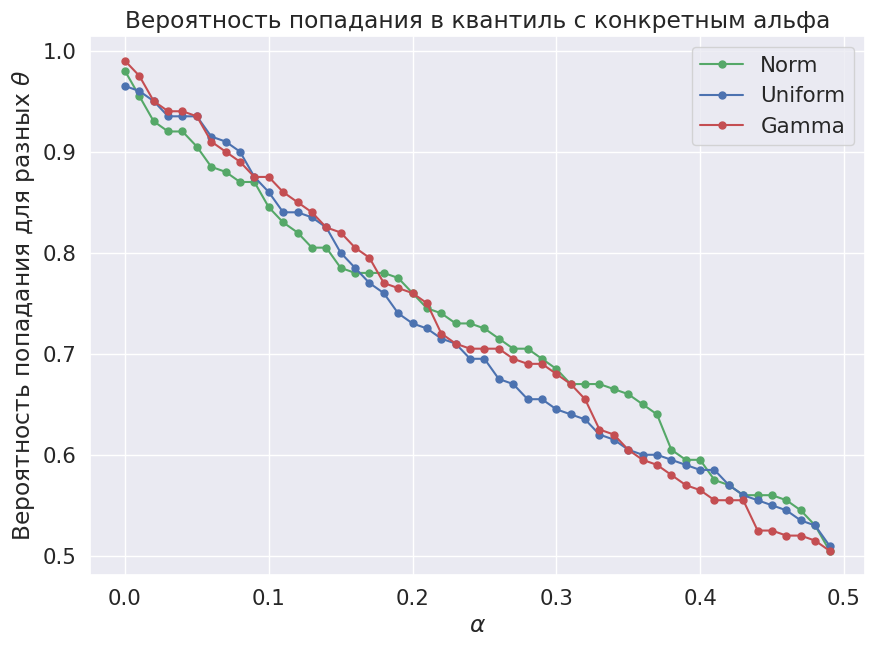

In [ ]:
all_counters_norm = []
all_counters_uniform = []
all_counters_gamma = []
for alpha in alphas:
  counter_norm = 0
  counter_uniform = 0
  counter_gamma = 0
  for i, theta in enumerate(thetas):
    counter_norm += count_if_in(alpha, theta, all_estimations[i][0])
    counter_gamma += count_if_in(alpha, theta, all_estimations[i][1])
    counter_uniform += count_if_in(alpha, theta, all_estimations[i][2])
  all_counters_norm.append(counter_norm / len(thetas))
  all_counters_gamma.append(counter_gamma / len(thetas))
  all_counters_uniform.append(counter_uniform / len(thetas))
plt.figure(figsize=(10, 7))
plt.plot(alphas, all_counters_norm, 'g-', markersize = 5, marker = 'o', label='Norm')
plt.plot(alphas, all_counters_uniform, 'b-', markersize = 5, marker = 'o', label='Uniform')
plt.plot(alphas, all_counters_gamma, 'r-', markersize = 5, marker = 'o', label='Gamma')
plt.title('Вероятность попадания в квантиль с конкретным альфа')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'Вероятность попадания для разных $\theta$')
plt.legend()

Как мы видим, вероятность не попасть в квантиль для конкретного α примерно и равна α, как и должно быть. Особенно четко это выражается в начале для гамма распределения, а с ростом α и для равномерного, и нормального распределений (можно сказать оно выраждается в прямую y = -x, которая нам и нужна). Истинный квантиль распределения оценок представляет собой точное значение квантиля в данном распределении. Он не должен зависеть от выборки о оценивается только аналитически, если известны характеристики распределения (в нашем случае все было известно). В чем же связь между выборочным и истинным квантилем? Выборочный квантиль используется для оценки истинного квантиля, как выборочная дисперсия используется для оценки теретической. Он является оценкой и позволяет вам приблизительно определить, где находится истинное значение квантиля в распределении оценок параметра. Если бы мы точно Если бы мы строили доверительный интервал с использованием истинных квантилей, а не выборочных, то этот интервал предоставлял бы точное покрытие истинного значения параметра с уровнем доверия α. В таком случае он бы, как уже было сказано раньше, никак не зависел бы от выборки и данных, которые мы предобрабатывали. На практике же нередко используется именно такой способ, который мы привели здесь, потому что очень редко можно сказать, что распределение каких-то случайных величин подчиняется тому или иному известному распределению с понятными аналитическими характеристиками (например, нормальное или Коши).

**Вывод:** Прорешав эту задачу и изучив метод бутстрепа, можно поговорить о том, почему этот метод действительно хорош и используется на практике.
- Бутстрепные статистики (как мы тоже выяснили из этого задания) при достаточно больших объемах данныъ имеют свойство сходится к истинным значениям параметров (это состоятельность), а также могут приближаться к нормальному распределению (это асимптотическая нормальность). Как мы знаем из прошлых домашек - это очень важные свойства оценок, которыми не стоит пренебрегать.
-Как было сказано в предыдущем пункте, нередко бутстреп - очень удобный способ провести некоторые тесты и исследования на основе только имеющихся данных, без предположения о форме распределения данной нам выборки (которая может даже и не принадлежать ни одному из широко известного набора).
-Аналитические способы обычно хороши, когда мы имеем доступ к реально большому объему данных, потому что мы всегда хотим рассматривать все в пределе (так аналитика получается точнее и конкретнее), бустреп же может показывать неплохие результаты даже на маленьких объемах данных при правильном использоввании.
-Бутстреп можно применять в многомерном анализе, а не только в одномерном, как было предложено в этом задании.
-В то же время при больших объемах данных нередко лучше прибегнуть к аналитическим методам, потому что они будут точнее и работать в разы быстрее, чем бутстреп.

### Задача 5. Байес.

**Эта задача стоит 20 баллов**

Байесовское оценивание даёт ультиматимативный способ построения оценок без какой-либо потери в информации. Теперь мы оцениваем параметры распределения не точками и не отрезками, а распределениями!

1. Будем смотреть на параметрическое семейство распределений как на условное распределение: $P_{\theta} = P(X | \theta)$. В байесовском подходе подразумевается, что параметр $\theta$ сам приходит из некоторого **априорного** распределения (которое статист либо предпологает сам, либо предпологает исходя из внешних знаний об области).

Вспомним теорему Байеса: $p(\theta | X) = \frac{p(X | \theta) p(\theta)}{p(X)}$, где знаменатель $p(x)$ получается как интеграл по $\theta$ от числителя. В зависимости от того, можем ли мы взять этот интеграл, выбирается тип байесовской оценки. $p(X | \theta)$ мы знаем, это хорошо нам знакомое правдоподобие, $p(\theta)$ называется априорным распределением (prior) параметра, мы его выбираем сами исходя из наших предпочтений, $p(X)$ от параметра не зависит и называется обоснованностью (evidence), и показывает, насколько правдоподобна выборка в терминах выбранного семейства распределений.

Для первого пункта задачи выберите некоторое нетривиальное значение параметра для двух распределений: $Bern(p)$, $Exp(\lambda)$ и сгенерируйте по одной выборке размера $N = 1000$.

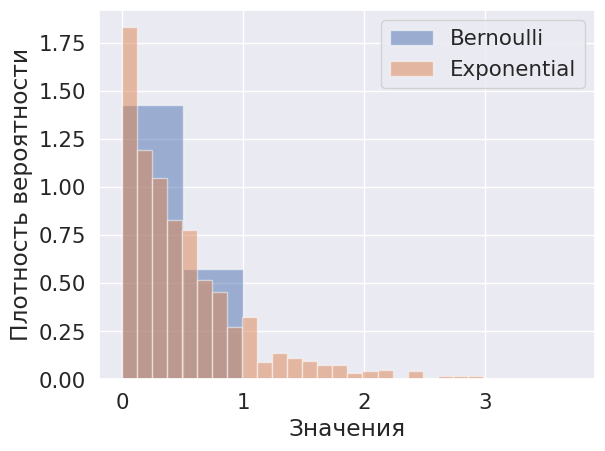

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

p_bernoulli = 0.3
lambda_exp = 2.0


np.random.seed(42)
sample_bernoulli = np.random.binomial(1, p_bernoulli, 1000)
sample_exp = np.random.exponential(scale=1/lambda_exp, size=1000)

plt.hist(sample_bernoulli, bins=2, density=True, alpha=0.5, label='Bernoulli')
plt.hist(sample_exp, bins=30, density=True, alpha=0.5, label='Exponential')
plt.legend()
plt.xlabel('Значения')
plt.ylabel('Плотность вероятности')
plt.show()

2. "Байес для бедных" (Poor man's bayes)

Пусть интеграл в знаменателе мы считать не умеем и мы готовы с этим смириться. Что в таком случае делать? Можно искать моду (максимум) апостериорной плотности $P(\theta | X)$, где $X$ --- выборка, и рассматривать оценку $\theta$ как точку максимума.

Подберите три различных априорных распределения на параметр и найдите максимум апостериорной плотности.
Преобразуйте задачу максимизации и найдите максимум по сетке или оптимизатором.

In [ ]:
from scipy.stats import beta
from scipy.stats import binom
from scipy.optimize import minimize

# Функция правдоподобия для Bernoulli
def likelihood_bernoulli(p, data):
    return p**sum(data) * (1 - p)**(len(data) - sum(data))

# Функция апостериорной плотности для Bernoulli
def posterior_bernoulli(p, data, prior_params):
    alpha, betta = prior_params
    return likelihood_bernoulli(p, data) * beta.pdf(p, alpha, betta)

# Находим MAP оценки для Bernoulli
map_estimate_1 = minimize(lambda p: -posterior_bernoulli(p, sample_bernoulli, (2, 5)), x0=0.5, method='Nelder-Mead').x[0]
map_estimate_2 = minimize(lambda p: -posterior_bernoulli(p, sample_bernoulli, (1, 1)), x0=0.5, method='Nelder-Mead').x[0]
map_estimate_3 = minimize(lambda p: -posterior_bernoulli(p, sample_bernoulli, (5, 2)), x0=0.5, method='Nelder-Mead').x[0]

print("MAP Estimates for Bernoulli (Prior 1):", map_estimate_1)
print("MAP Estimates for Bernoulli (Prior 2):", map_estimate_2)
print("MAP Estimates for Bernoulli (Prior 3):", map_estimate_3)


MAP Estimates for Bernoulli (Prior 1): 0.2875976562499998
MAP Estimates for Bernoulli (Prior 2): 0.28798828124999987
MAP Estimates for Bernoulli (Prior 3): 0.2905273437499998


In [ ]:
from scipy.stats import gamma

# Функция правдоподобия для Exponential
def likelihood_exponential(lmbda, data):
    return lmbda * np.exp(-lmbda * data)

# Функция апостериорной плотности для Exponential
def posterior_exponential(lmbda, data, prior_params):
    alpha, beta = prior_params
    return likelihood_exponential(lmbda, data).prod() * gamma.pdf(lmbda, alpha, scale=1.0 / beta)

# Находим MAP оценки для Exponential
map_estimate_1 = minimize(lambda lmbda: -posterior_exponential(lmbda, sample_exp, (2, 0.5)), x0=0.5, method='Powell').x[0]
map_estimate_2 = minimize(lambda lmbda: -posterior_exponential(lmbda, sample_exp, (1, 1)), x0=0.5, method='Powell').x[0]
map_estimate_3 = minimize(lambda lmbda: -posterior_exponential(lmbda, sample_exp, (3, 2)), x0=0.5, method='Powell').x[0]

print("MAP Estimates for Exponential (Prior 1):", map_estimate_1)
print("MAP Estimates for Exponential (Prior 2):", map_estimate_2)
print("MAP Estimates for Exponential (Prior 3):", map_estimate_3)


MAP Estimates for Exponential (Prior 1): 1.9342576588243372
MAP Estimates for Exponential (Prior 2): 1.932218777734092
MAP Estimates for Exponential (Prior 3): 1.9322724262842599


Сделайте вывод о том, как влияет априорная информация о параметре на оценку? Вспомните лекции из курса машинного обучения. На какой объект похоже априорное распределение? Как его следует выбирать. Как связаны максимум апостериорной плотности и оценка максимального правоподобия?

Как видим методы оптимизации из scipy выдали нам результаты, действительно очень близкие к тем параметрам, которые мы изначально брали в распределениях.<br>
Теперь отвечаем на вопросы в этом пункте: По факту априорная информация представляет из себя наши предположения о распределении параметра до того, как у нас вообще появились данные. А само априорное распределение - по факту предварительное предположение о параметре. Например, если мы примерно знаем отрезок, в котором лежит значение нашего параметра, то мы можем выбрать априорное распределение с плотностью вероятности, которая будет увеличиваться в этом отрезке.<br>
Также важно граммотно выбрать априорное распределение. Например, если мы возьмем априорное распределение с дисперсией равной нулю около какого-то значения, то получившаяся оценка будет сжата вокруг этого значения, даже если данные указывают на другое. Если же априорное распределение будет более широким, то оценка может получиться размытой, ближе к оценке максимального правдоподобия.<br>
MAP - это оценка параметра, которая максимизирует апостериорную плотность. Она на самом деле учитывает и априорное распределение и правдоподобие. Еси априорное распределение (как уже было написано раньше) сосредоточено около какого-то значения, то оценка MAP будет ближе к нему, чем оценка максимального правдоподобия.

3. Байес для богатых (обычный байес).

Отказываться считать интеграл нельзя, за это полагается смертная казнь.

Проверьте, что для распределения Бернулли можно взять априорное распределение в виде бета распределения $Beta(1, 1)$ и тогда апостериорная плотность будет также принадлежать семейству бета распределений. Какие параметры будут у апостериорной плотности?

Решение: Возьмем для начала бетта распределение с параметрами 1, 1 для проверки того, что дря распределение Бернулли можно взять априорное распределение. Теперь рассмотрим процесс обновление апостериорной плотности.<br>
Априорная плотность: Beta(1, 1)<br>
Апостериорная плотность: $Beta(α + \sum x, β + \sum x)$, где α, β - параметры априорного распределения, а $\sum x$ - сумма наблюдений, n - их количество.<br>
Так как мы рассматриваем распределение Бернулли, наблюдения могут принимать только два значения, а именно 0 и 1. Значит сумма x будет тоже принимать только значения: сумма единиц или ноль.<br>
Пусть у нас есть n наблюдений из которых k - единицы. Тогда сумма, очевидно, будет равна k, а апостериорная плотнось для параметра Бернулли с априорным распределением Beta(1, 1) будет Beta(1 + k, 1 + (n - k)). Значит апостериорная плотност будет принадлежать семейству бета распределений с параметрами (1 + k, 1 + (n - k)).

Рассуждение выше означает, что интеграл можно не считать, так как он будет известен исходя из того, что апостериорное распределение будет принадлежать семейству бета распределений. А найденные параметры бета распределения и будут хорошим приближением параметра. По выборке из распределения Бернулли посчитайте параметры апостериорной плотности и изобразите её плотность на графике.

289 713


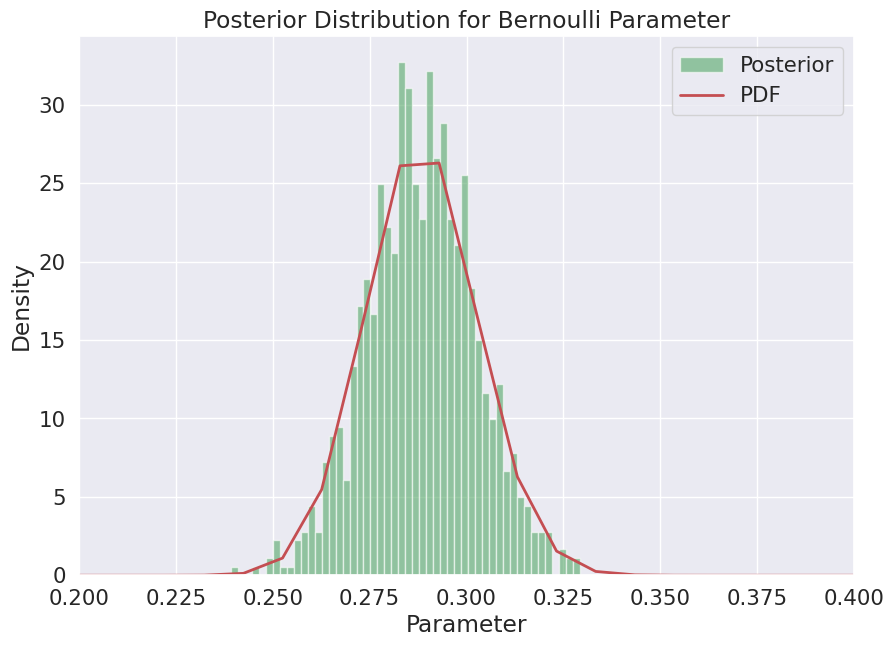

In [ ]:
k = sum(sample_bernoulli)
n = len(sample_bernoulli)

alpha = 1 + k
betta = 1 + (n - k)

samples = np.random.beta(alpha, betta, 1000)

plt.figure(figsize=(10, 7))
plt.hist(samples, bins=50, density=True, alpha=0.6, color='g', label='Posterior')
x = np.linspace(0, 1, 100)
plt.plot(x, beta.pdf(x, alpha, betta), 'r-', lw=2, label='PDF')
plt.xlabel('Parameter')
plt.ylabel('Density')
plt.legend()
plt.xlim([0.2, 0.4])
plt.title('Posterior Distribution for Bernoulli Parameter')
print(alpha, betta)

Что Вы бы брали точечной оценкой параметра исходя из апостериорного распределения? Почему?

Вспомним, что параметр нашего распределения Бернулли равнялся 0,3. А теперь внимательно посмотрим на график и заметим, что в точке 0,3 по оси параметра у нас практически достигается максимум плотности (это кстати тоже одно из рассуждений, которое было сделано в пункте 2 этого номера). Значит мы можем найти точку, в которой достигается максимум плотности апостериорного распределения и сказать, что это и будет оценкой на наш параметр. Важно отметить, что сам максимум достигается примернов в точке 0.29, но мы ищем оценку.

Как апостериорное распределение изменяется при разных параметрах априорного бета-распределения? Как выбирать эти параметры на практике? Какой смысл они несут? Снова вспомните лекции из курса машинного обучения.

Такие пары распределений называются **сопряжёнными**. Для сопряжённых распределений верно, что после применения теоремы Байеса апостериорная плотность лежит в том же параметрическом семействе, что и априорная.

Для экспоненциального распределения сопряжённым является Гамма-распределение.

Проделайте для экспоненциального распределения ту же работу, что и для Бернулли.

Сделайте вывод о байесовском оценивании: